## Importing all the required Libraries

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols     
from statsmodels.stats.anova import _get_covariance,anova_lm
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Problem 1:

### A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

## Loading the Dataset - Fever.csv File

In [2]:
df = pd.read_csv("Fever.csv")

## Checking the top 5 records

In [3]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [4]:
df['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [5]:
df['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

## Checking the shape and information of the dataframe

In [6]:
df.shape

(36, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


## Checking for any missing values 

In [8]:
df.isna().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

## Checking the summary of Dataset

In [9]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


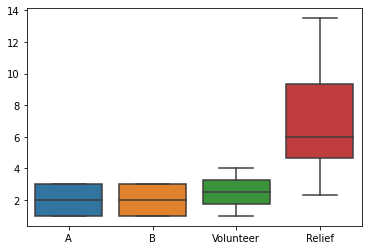

In [10]:
sns.boxplot(data=df)

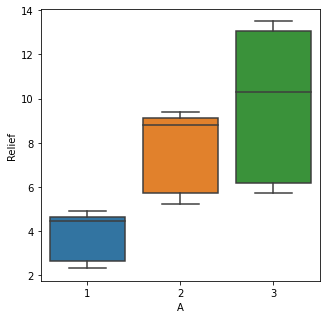

In [11]:
plt.figure(figsize= (5,5))
sns.boxplot(x = 'A',y = 'Relief',data = df)

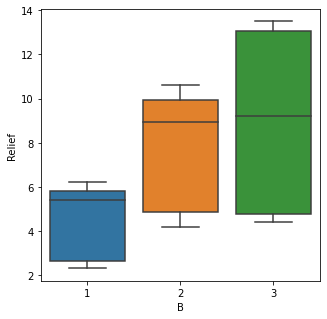

In [12]:
plt.figure(figsize= (5,5))
sns.boxplot(x = 'B',y = 'Relief',data = df)

### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Fever’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Fever’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [14]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments?

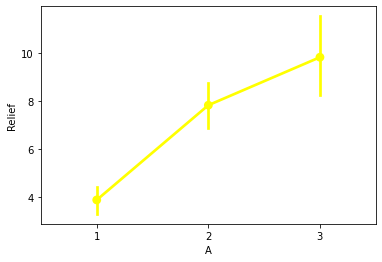

In [15]:
sns.pointplot(x='A', y='Relief', data=df, color = 'yellow')

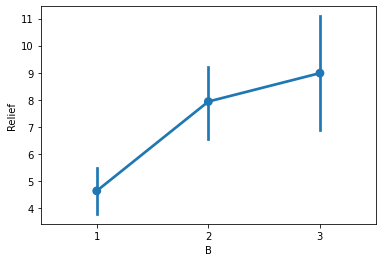

In [16]:
sns.pointplot(x='B', y='Relief', data=df)

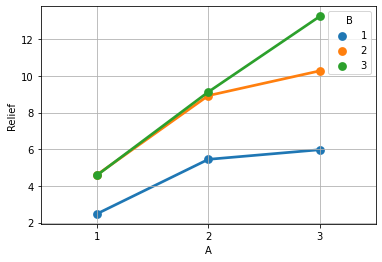

In [17]:
sns.pointplot(x='A', y='Relief', hue ='B',data=df, ci=None);
plt.grid()

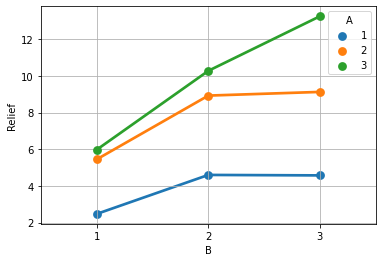

In [18]:
sns.pointplot(x='B', y='Relief', hue ='A',data=df, ci=None);
plt.grid()

### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

In [19]:
formula = 'Relief ~ C(A) + C(B)+ C(A):C(B)'
model2 = ols(formula, df).fit()
aov_table2 = anova_lm(model2)
print(aov_table2)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


### 1.6 Mention the business implications of performing ANOVA for this particular case study

After performing ANOVA, we can observe that both the ingredients A & B play a significant role in providing relief. As the level of both variables increases the level of relief also increases. 

By performing two-way ANOVA between variable ‘A’ & ‘B’ we can say that the variance between the variables is less when compared individually.

Hence, we can say that the impact of variables ‘A’ & ‘B’ on the relief hours is high individually rather than in using it together. It means that the impact of individual variable is higher than together. Hence it would be better if the both the ingredients are tested individually at higher levels. 


# Problem Statement 2

## The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

#### Data Dictionary 
1)  Names: Names of various university and colleges

2)  Apps: Number of applications received

3)  Accept: Number of applications accepted

4)  Enroll: Number of new students enrolled

5)  Top10perc: Percentage of new students from top 10% of Higher Secondary class

6)  Top25perc: Percentage of new students from top 25% of Higher Secondary class

7)  F. Undergrad: Number of full-time undergraduate students

8)  P. Undergrad: Number of part-time undergraduate students

9)  Outstate: Number of students for whom the particular college or university is Out-of-state tuition

10) Room.Board: Cost of Room and board

11) Books: Estimated book costs for a student

12) Personal: Estimated personal spending for a student

13) PhD: Percentage of faculties with Ph.D.’s

14) Terminal: Percentage of faculties with terminal degree

15) S.F.Ratio: Student/faculty ratio

16) perc.alumni: Percentage of alumni who donate

17) Expend: The Instructional expenditure per student

18) Grad.Rate: Graduation rate


In [141]:
df2 = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [142]:
df2.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [143]:
df2.shape

(777, 18)

In [144]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [145]:
df2.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [146]:
df2.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [147]:
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


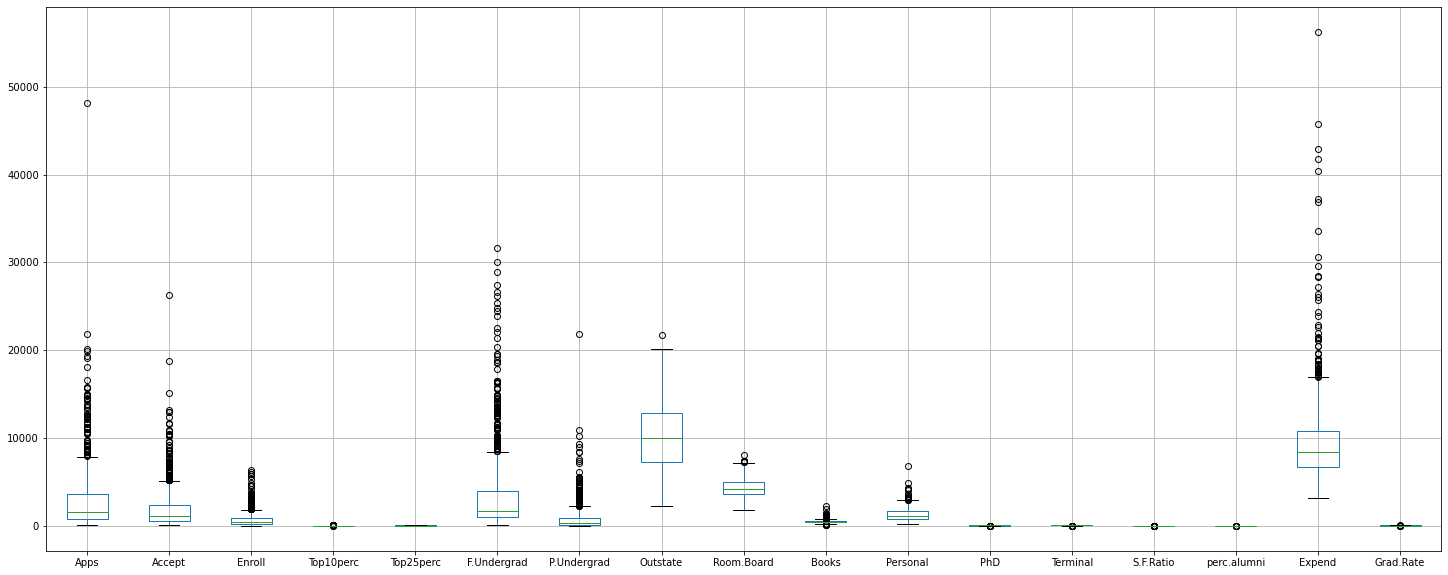

In [166]:
df2.boxplot(figsize = (25,10))

In [149]:
df2.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [150]:
col = df2[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

In [151]:
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


### 2.1) Perform Exploratory Data Analysis. The inferences drawn from this should be properly documented.

### Univariate Analysis

Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. 

The key point is that there is only one variable involved in the analysis

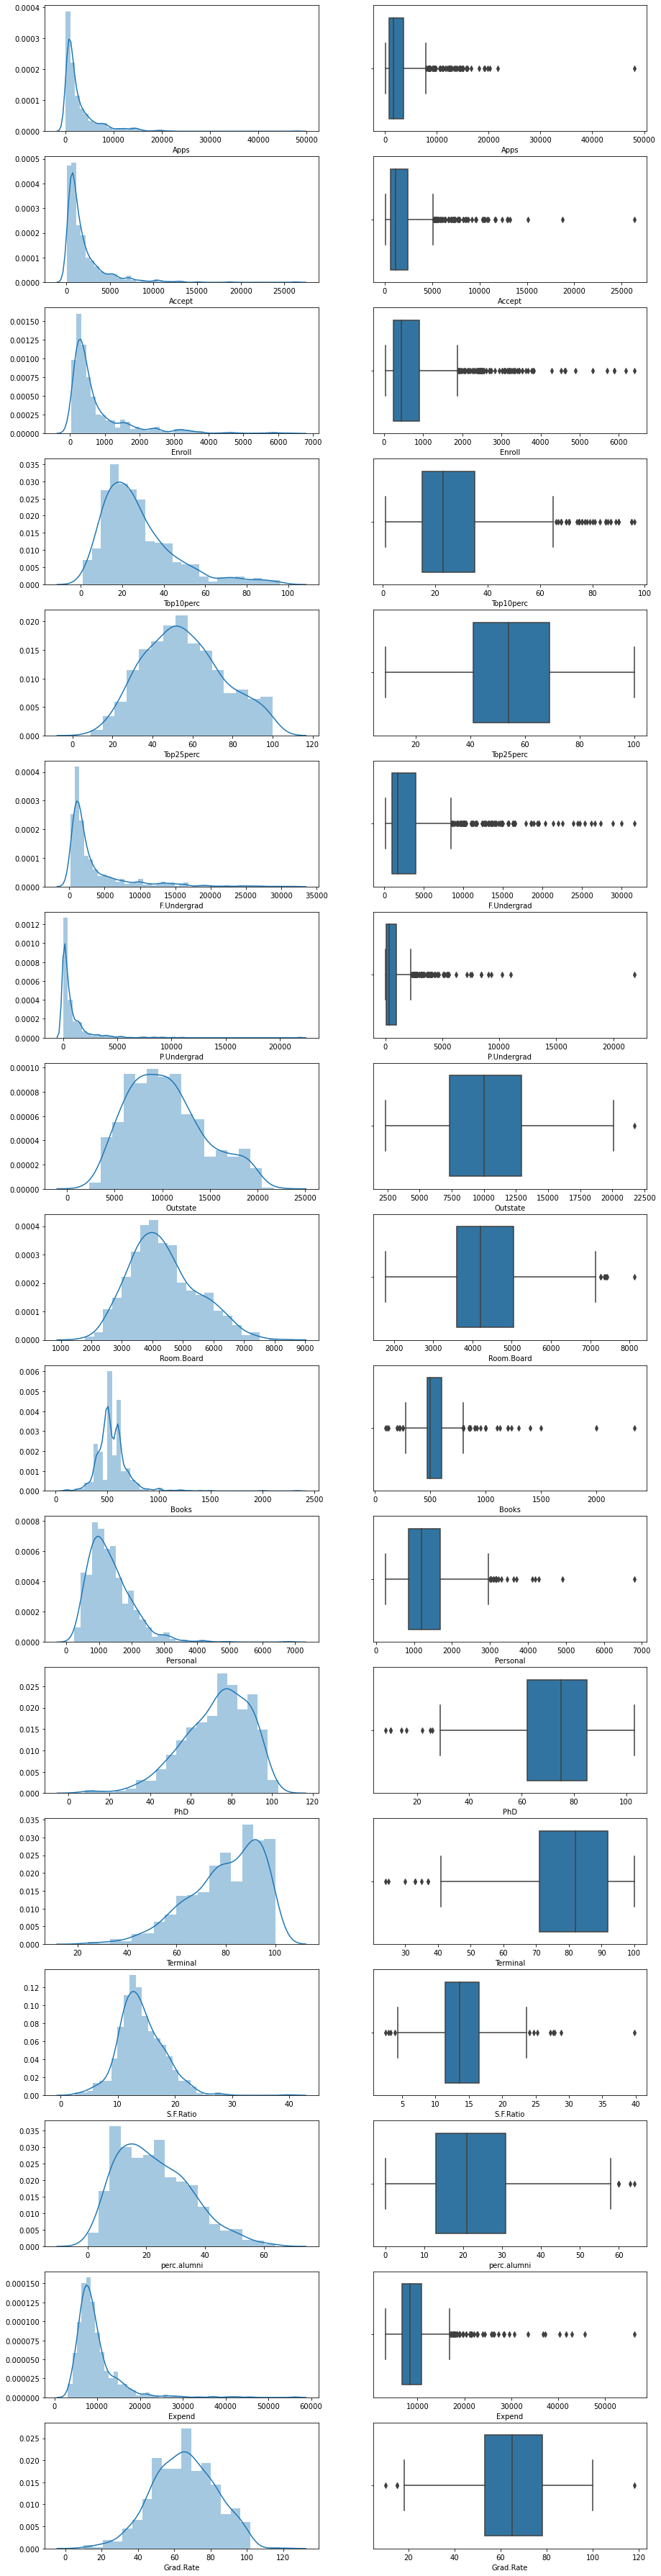

In [152]:
fig,axes = plt.subplots(nrows = 17, ncols = 2)

fig.set_size_inches(15,65)

m = 0
n = 0
for col in cols:
    sns.distplot(df2[col],ax = axes[m][n])
    n = n + 1
    sns.boxplot(df2[col],ax = axes[m][n])
    m = m + 1
    n = n - 1

##### From the above graphs we can observe the following
1. Few data sets are rightly skewed, and few are left skewed. 
2. Except for the “Top 25 percent” column all is having outliers.
3. ‘Top 25 percent’ histogram is symmetrical  


### Multivariate Analysis

There are essentially 3 major scenarios that we will come across when we perform Multi-variate analysis

1. Both variables of interest are qualitative

2. One variable is qualitative and the other is quantitative

3. Both variables are quantitative


In [153]:
df2.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


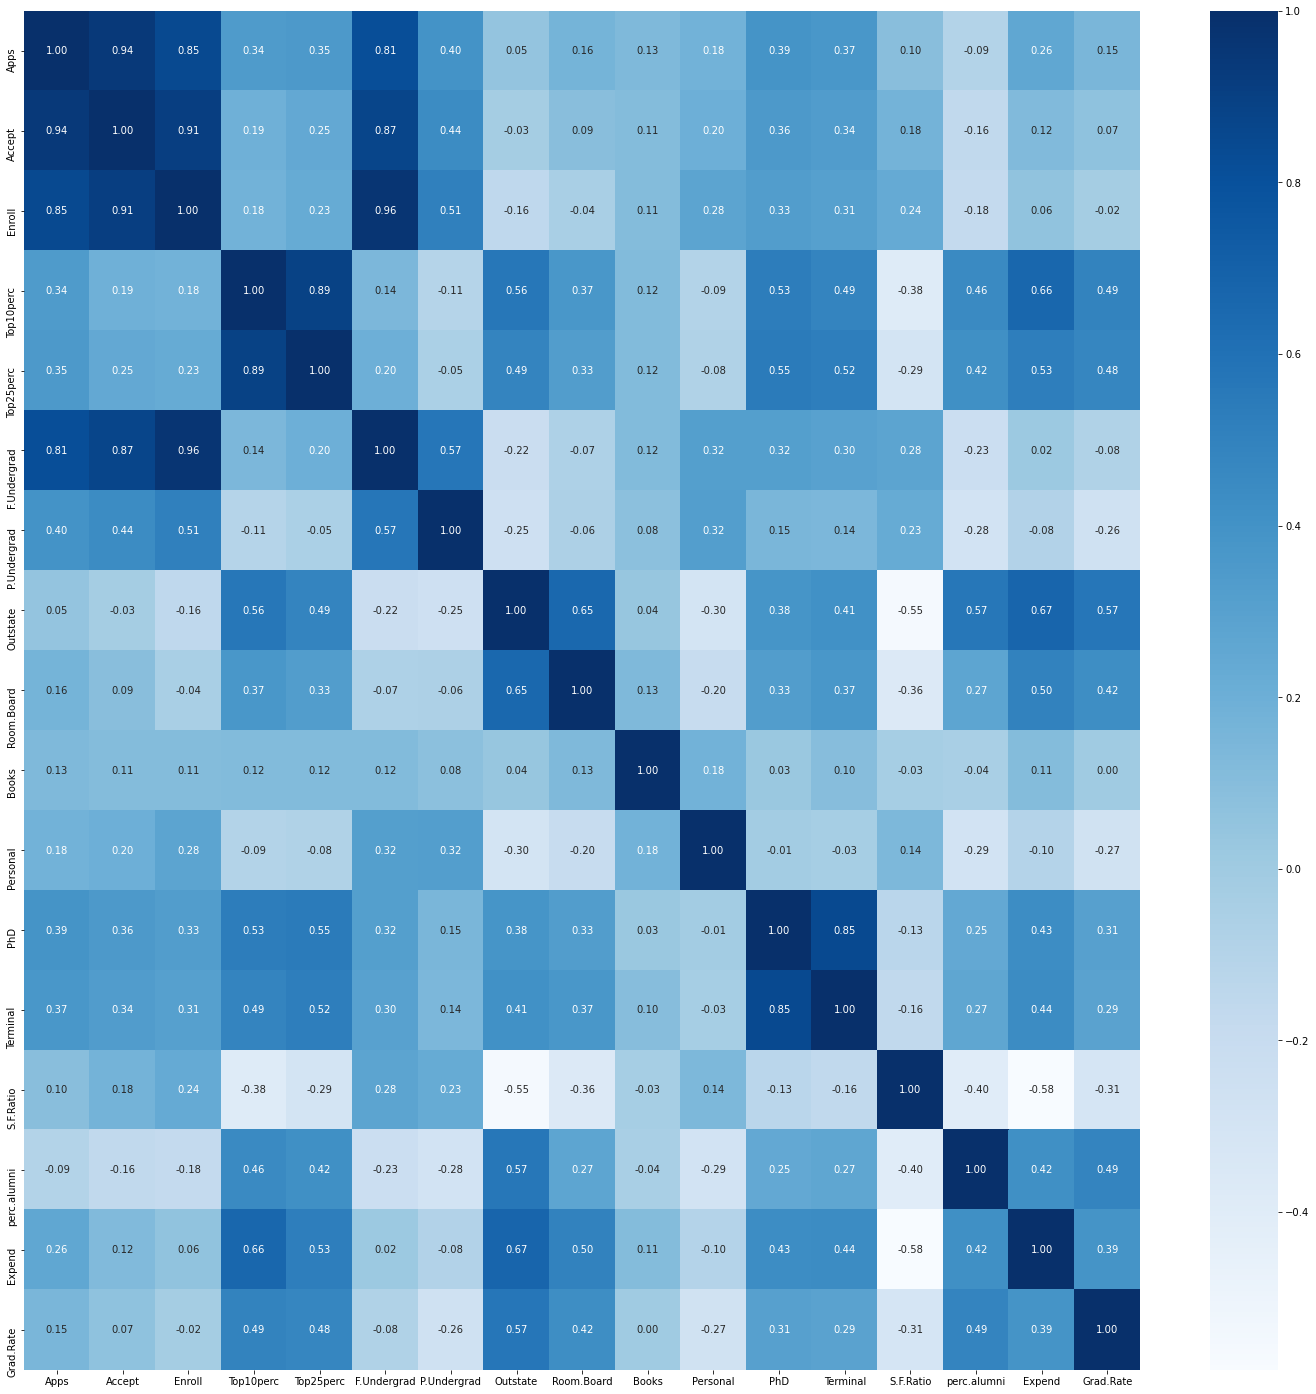

In [233]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

##### From the above heatmap we can say the following are highly corelated to each other
1. No of applications received and the number of students is accepted.
2. No of application received and no of students enrolled.
3. No of students enrolled and no of full-time undergraduates.

### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Student Expenditure is having values in thousands and Student to Faculty ratio is in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

In this method, we convert variables with different scales of measurements into a single scale

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

#### Droping 'Names' column as scaling can only be done for continous variables

In [157]:
df2 = df2.drop(['Names'],axis = 1)

In [158]:
from scipy.stats import zscore

In [159]:
data_new = df2.apply(zscore)
data_new.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


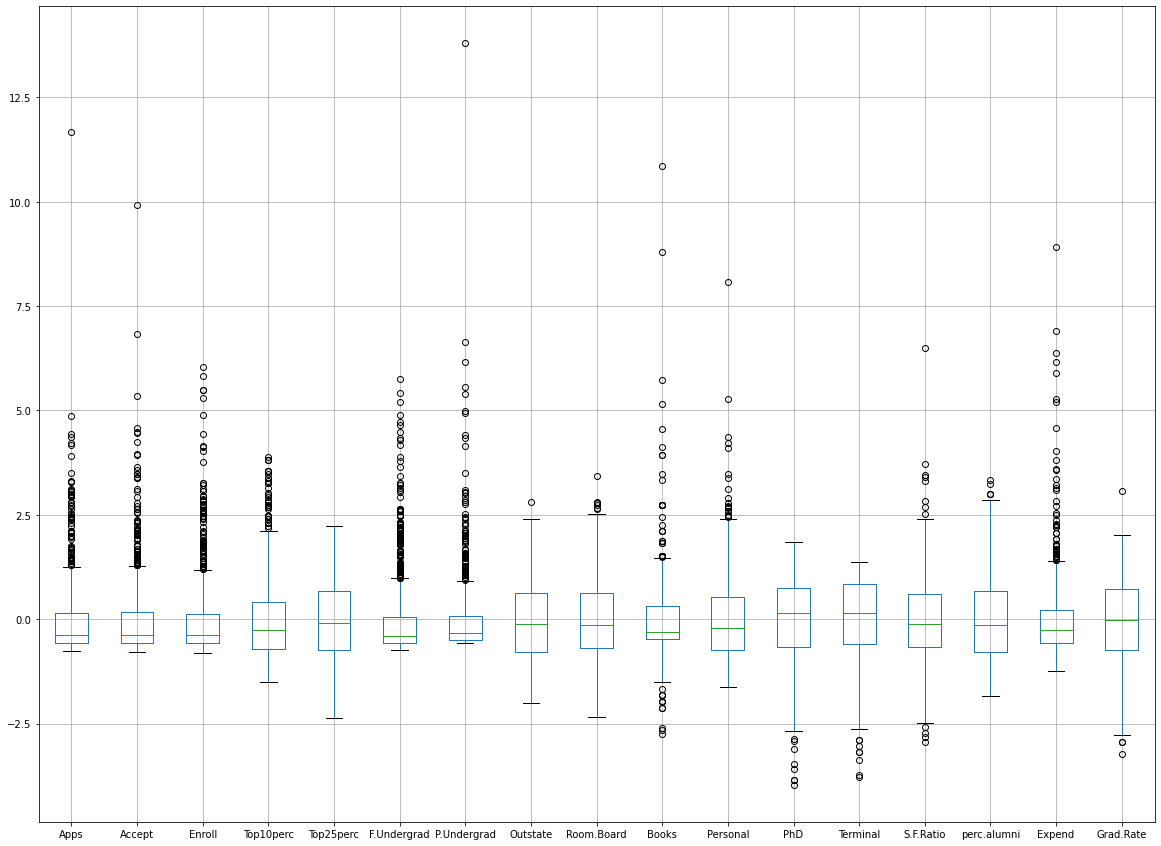

In [160]:
data_new.boxplot(figsize = (20,15))

### 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

##### Covariance : 
Indicates the direction of the linear relationship between variables

###### Corelation :  
Measures both the strength and direction of the linear relationship between two variables.Correlation is a function of the covariance. You can obtain the correlation coefficient of two variables by dividing the covariance of these variables by the product of the standard deviations of the same values.

In [161]:
cov_matrix = np.cov(data_new.T)
print(cov_matrix)

[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.54656564
   0.5254

In [162]:
data_new.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [169]:
data_new.describe().round(4)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000,777.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006,1.0006
min,-0.7551,-0.7948,-0.8023,-1.5065,-2.3644,-0.7346,-0.5615,-2.0149,-2.3518,-2.7478,-1.6119,-3.9626,-3.7860,-2.9298,-1.8366,-1.2406,-3.2309
25%,-0.5754,-0.5776,-0.5794,-0.7124,-0.7476,-0.5586,-0.4997,-0.7762,-0.6939,-0.4811,-0.7251,-0.6533,-0.5915,-0.6547,-0.7868,-0.5575,-0.7260
50%,-0.3733,-0.3710,-0.3726,-0.2586,-0.0908,-0.4111,-0.3301,-0.1121,-0.1437,-0.2993,-0.2079,0.1434,0.1561,-0.1238,-0.1408,-0.2459,-0.0270
75%,0.1609,0.1654,0.1314,0.4221,0.6671,0.0629,0.0734,0.6179,0.6318,0.3068,0.5311,0.7562,0.8358,0.6093,0.6667,0.2242,0.7303
max,11.6587,9.9248,6.0437,3.8823,2.2334,5.7647,13.7899,2.8005,3.4366,10.8523,8.0684,1.8593,1.3796,6.4994,3.3315,8.9247,3.0604


###### We can see after scaling the mean of the data set is Zero and Standard Deviation is around One

##### Finally, we can say that after scaling the covariance and correlation matrix have the same values 

### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

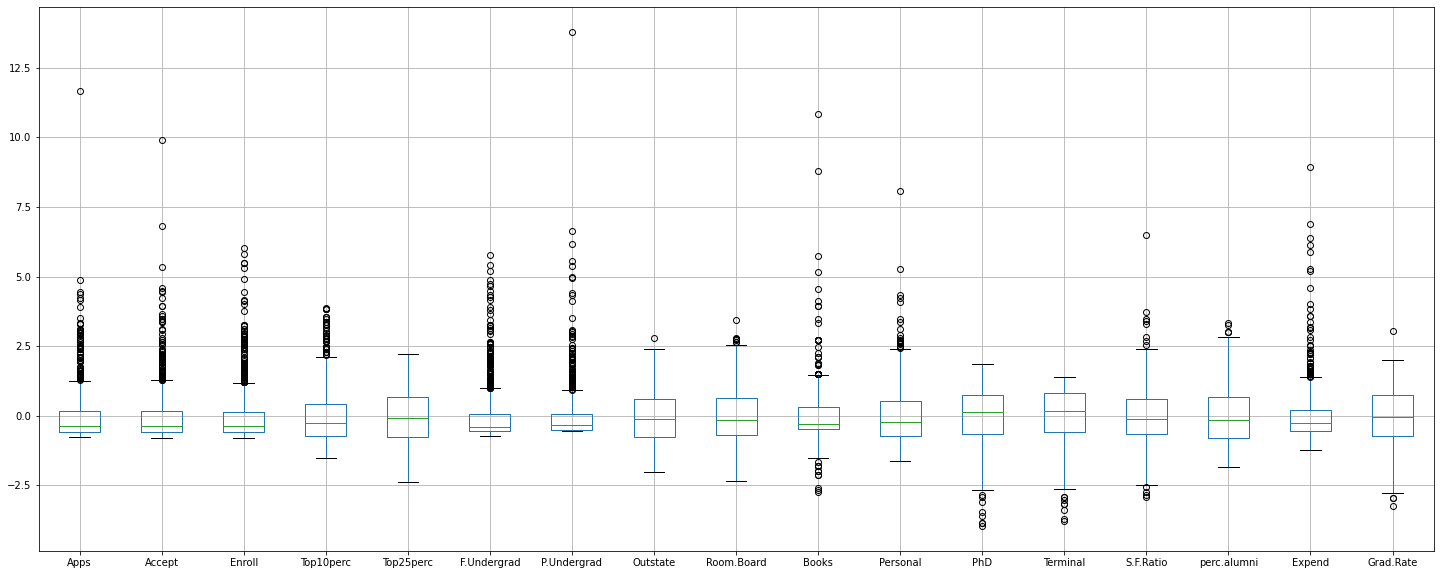

In [173]:
data_new.boxplot(figsize=(25,10))

##### After comparing the outliers before and after scaling the dataset we can say that scaling has no impact on the outliers. Scaling only standardizes the dataset

### 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.

##### Before going to perform PCA we can treat the outliers as the transformation will be effective

In [175]:
cols= ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']

In [176]:
def remove_outliner(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [177]:
for col in cols:
    lower_limit, upper_limit = remove_outliner(data_new[col])
    data_new[col] = np.where(data_new[col] > upper_limit, upper_limit, data_new[col])
    data_new[col] = np.where(data_new[col] < lower_limit, lower_limit, data_new[col])   

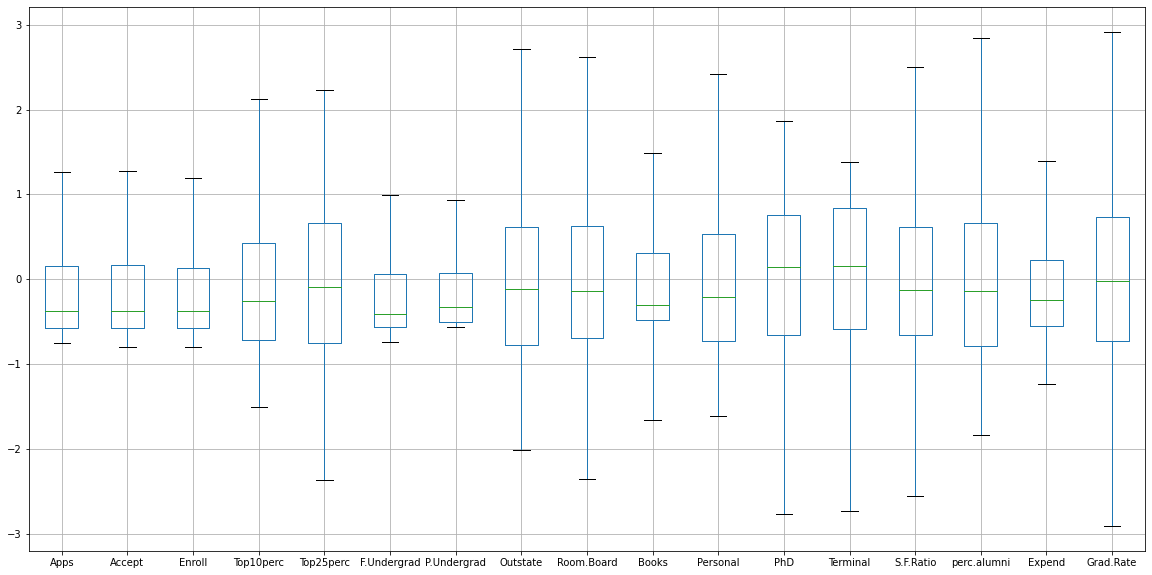

In [180]:
data_new.boxplot(figsize=(20,10))

### Identify eigenvalues and eigenvectors

In [181]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

#### Eigen Values

In [188]:
print('Eigen Values \n', eig_vals)

Eigen Values 
 [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


In [202]:
print('Eigen Vectors \n', eig_vecs.round(3))

Eigen Vectors 
 [[-0.249  0.332  0.063 -0.281  0.006  0.016  0.042  0.103  0.09  -0.053
   0.359 -0.459  0.043 -0.133  0.081 -0.596  0.024]
 [-0.208  0.372  0.101 -0.268  0.056 -0.008  0.013  0.056  0.178 -0.041
  -0.543  0.519 -0.058  0.145  0.033 -0.293 -0.145]
 [-0.176  0.404  0.083 -0.162 -0.056  0.043  0.028 -0.059  0.129 -0.034
   0.61   0.404 -0.069 -0.03  -0.086  0.445  0.011]
 [-0.354 -0.082 -0.035  0.052 -0.395  0.053  0.161  0.123 -0.341 -0.064
  -0.145  0.149 -0.008 -0.698 -0.108 -0.001  0.039]
 [-0.344 -0.045  0.024  0.11  -0.427 -0.033  0.118  0.102 -0.404 -0.015
   0.08  -0.052 -0.273  0.617  0.152 -0.022 -0.089]
 [-0.155  0.418  0.061 -0.1   -0.043  0.043  0.025 -0.079  0.059 -0.021
  -0.415 -0.56  -0.081 -0.01  -0.056  0.524  0.056]
 [-0.026  0.315 -0.14   0.159  0.302  0.191 -0.061 -0.571 -0.561  0.223
   0.009  0.053  0.101 -0.021  0.019 -0.126 -0.064]
 [-0.295 -0.25  -0.047 -0.131  0.223  0.03  -0.109 -0.01   0.005 -0.187
   0.051 -0.102  0.143 -0.038 -0.034  0.142 

### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [203]:
cols

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [205]:
eig_vecs[0].round(4)

array([-0.2488,  0.3316,  0.0631, -0.2813,  0.0057,  0.0162,  0.0425,
        0.1031,  0.0902, -0.0525,  0.359 , -0.4591,  0.043 , -0.1334,
        0.0806, -0.5958,  0.0241])

In [ ]:
Explicit Form = [(-0.2488)*Apps + (0.3316)*Accept + (0.0631)*Enroll + (-0.2813)*Top10perc + (0.0057)*Top25perc + (0.0162)* F.Undergrad + (0.0425)* P.Undergrad + (0.1031)*Outstate + (0.0902)* Room.Board + (-0.0525)*Books + (0.359)*Personal + (-0.4591)*PhD + (0.043)*Terminal + (-0.1334)*S.F.Ratio + (0.0806)*perc.alumni + (-0.5958)*Expend
       + (0.0241)*Grad.Rate]

### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [219]:
total = sum(eig_vals)
var_exp = [( i /total ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp.round(3))

Cumulative Variance Explained [ 32.021  58.361  65.262  71.185  76.673  81.658  85.217  88.67   91.788
  94.163  96.004  97.3    98.286  99.132  99.649  99.865 100.   ]


### Scree Plot

A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA)

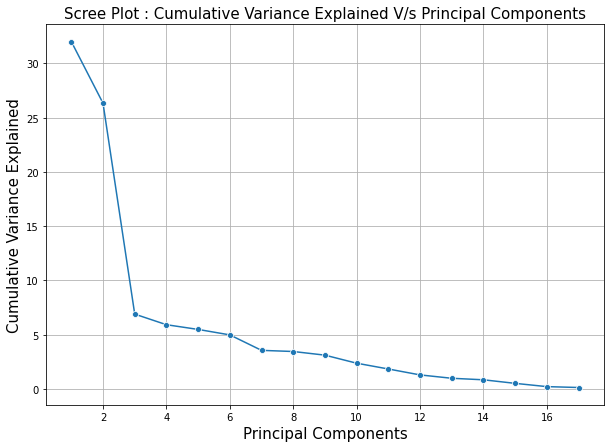

In [229]:
plt.figure(figsize = (10,7))
sns.lineplot(y = var_exp,x = range(1,len(var_exp)+1),marker = 'o')
plt.ylabel('Cumulative Variance Explained',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Scree Plot : Cumulative Variance Explained V/s Principal Components',fontsize = 15)
plt.grid()

- Visually we can observe that there is steep drop in variance explained with increase in number of PC's

- We will proceed with 8 components here depending on requirement 90% variation

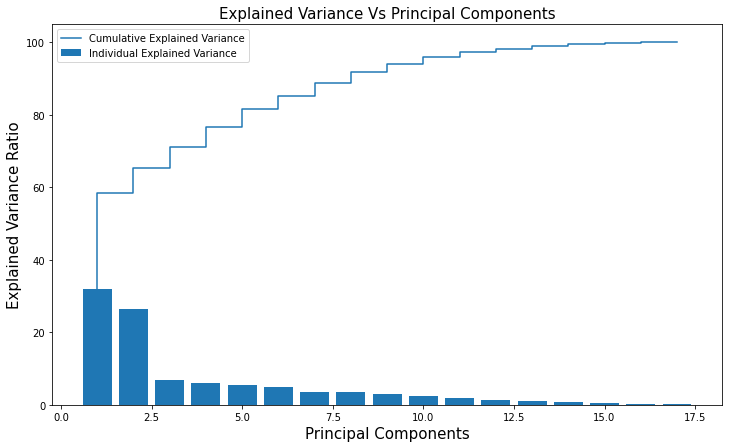

In [211]:
plt.figure(figsize = (12,7))
plt.bar(range(1,eig_vals.size+1),var_exp,label ='Individual Explained Variance')
plt.step(range(1,eig_vals.size+1),cum_var_exp,label ='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Explained Variance Vs Principal Components',fontsize = 15)
plt.legend(loc = 'best')

#### Using PCA from sklearn's decomposition class for finding principal components

In [212]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
data_reduced = pca.fit_transform(data_new)

In [213]:
pca.components_

array([[ 0.0929684 ,  0.06592707,  0.03166929,  0.33452816,  0.36427546,
         0.01149875, -0.04622402,  0.37830181,  0.29777508,  0.0401252 ,
        -0.10944135,  0.31241468,  0.31563577, -0.238936  ,  0.28566756,
         0.24699418,  0.31117828],
       [ 0.32104652,  0.3319699 ,  0.35033549,  0.06754279,  0.13142781,
         0.32452837,  0.20972858, -0.20665209, -0.07383062,  0.13395669,
         0.29386253,  0.30728219,  0.28923834,  0.27738993, -0.26160327,
        -0.02920582, -0.12680266],
       [ 0.06660652,  0.07883241,  0.01381154, -0.32328505, -0.41399578,
         0.02193807,  0.1038968 ,  0.2446006 ,  0.65435548,  0.06932308,
         0.02906196,  0.01051885,  0.07534077, -0.19726187, -0.35032544,
         0.14253472, -0.14343185],
       [-0.0129432 , -0.03420729, -0.01122623,  0.21141739,  0.19443136,
        -0.01744947, -0.02676078,  0.02000679, -0.07736692,  0.29066279,
         0.60616613, -0.21336602, -0.22034156, -0.50833033, -0.05443422,
         0.17754101

In [215]:
pca.explained_variance_ratio_
var = np.round((np.cumsum(pca.explained_variance_ratio_) * 100),2)
var

array([39.6 , 59.41, 66.78, 73.56, 79.59, 83.98, 87.97, 91.4 ])

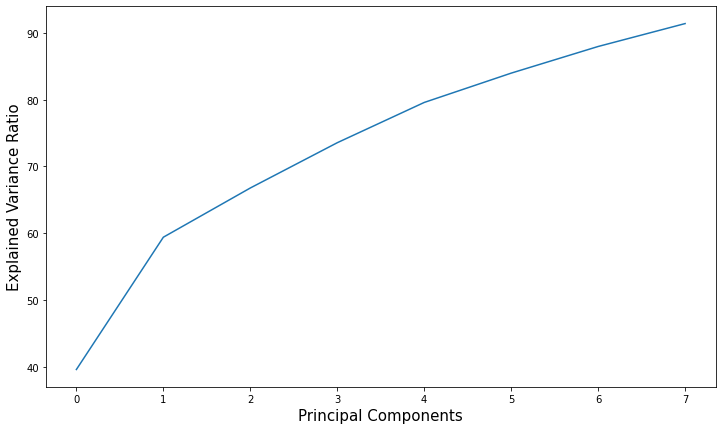

In [225]:
plt.figure(figsize = (12,7))
plt.ylabel('Explained Variance Ratio',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.plot(var)

In [217]:
df_comp = pd.DataFrame(pca.components_,columns = list(data_new))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.092968,0.065927,0.031669,0.334528,0.364275,0.011499,-0.046224,0.378302,0.297775,0.040125,-0.109441,0.312415,0.315636,-0.238936,0.285668,0.246994,0.311178
1,0.321047,0.331970,0.350335,0.067543,0.131428,0.324528,0.209729,-0.206652,-0.073831,0.133957,0.293863,0.307282,0.289238,0.277390,-0.261603,-0.029206,-0.126803
2,0.066607,0.078832,0.013812,-0.323285,-0.413996,0.021938,0.103897,0.244601,0.654355,0.069323,0.029062,0.010519,0.075341,-0.197262,-0.350325,0.142535,-0.143432
3,-0.012943,-0.034207,-0.011226,0.211417,0.194431,-0.017449,-0.026761,0.020007,-0.077367,0.290663,0.606166,-0.213366,-0.220342,-0.508330,-0.054434,0.177541,-0.264098
4,0.246748,0.228775,0.191149,0.077417,0.117971,0.150299,0.069900,0.046406,0.205895,0.054402,-0.013263,-0.442567,-0.484983,0.128203,-0.087313,-0.065771,0.543795


### 2.8) Mention the business implication of using the Principal Component Analysis for this case study.

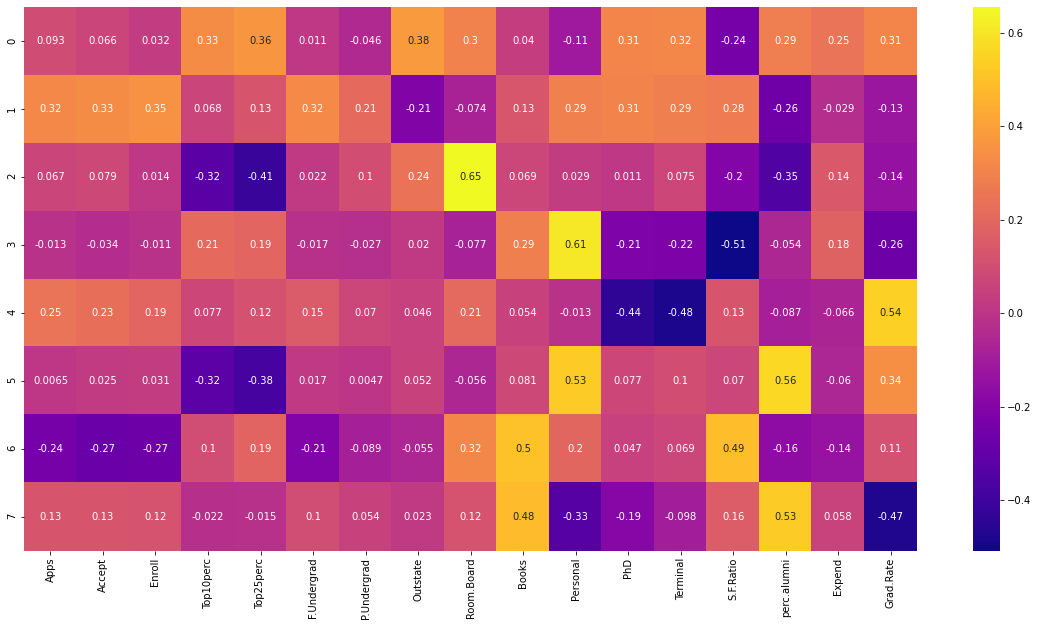

In [237]:
plt.figure(figsize = (20,10))
sns.heatmap(df_comp,annot = True,cmap='plasma')

- This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself
- Depending on relations ship, we could go ahead and label relationship with features
- Component 2 looks more related to the Cost of Room and Board, We can label it as school expenses
- Component 3 looks more related to the Estimated personal spending for a student, We can label it as student expenses
- Component 4 looks more related to the Graduation Rate, We can label it as Pass out percentage
- Component 5 looks more related to the Estimated personal spending for a student & percentage of alumni who donate
- Component 6 looks more related to the Estimated book costs for a student & student to faculty ratio
- Component 7 looks more related to the Estimated book costs for a student & percentage of alumni who donate
- Here Component 2 is higly correlated to the cost of the room and board according to the heatmap. 